# Sports Article Objectivity

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# Load in data
df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_3/datasets/sports-articles.csv')
df

,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
0,objective,109,0,1,7,9,0,5,8,6,...,0,3,0,11,0,0,0,0,1,18
1,objective,309,21,4,1,19,1,4,35,23,...,0,10,0,13,0,14,9,1,1,14
2,objective,149,6,1,8,14,0,5,15,11,...,0,2,0,8,0,3,2,1,1,18
3,objective,305,18,5,7,26,0,10,37,21,...,0,8,3,13,1,7,1,1,1,20
4,objective,491,23,8,33,47,0,12,61,36,...,0,16,2,34,1,5,6,1,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,subjective,926,46,34,5,83,1,20,96,63,...,16,46,10,13,12,49,29,1,1,24
996,subjective,876,48,26,9,109,1,16,89,49,...,8,43,5,34,9,19,31,1,1,21
997,subjective,1469,82,53,14,171,1,10,157,106,...,9,49,12,40,19,51,42,1,1,18
998,subjective,343,7,5,4,24,0,9,28,20,...,0,8,1,3,3,25,7,1,1,11


In [3]:
# Drop the label to create the X data
X = df.drop('Label', axis=1)
X

,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,JJ,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
0,109,0,1,7,9,0,5,8,6,0,...,0,3,0,11,0,0,0,0,1,18
1,309,21,4,1,19,1,4,35,23,0,...,0,10,0,13,0,14,9,1,1,14
2,149,6,1,8,14,0,5,15,11,0,...,0,2,0,8,0,3,2,1,1,18
3,305,18,5,7,26,0,10,37,21,1,...,0,8,3,13,1,7,1,1,1,20
4,491,23,8,33,47,0,12,61,36,0,...,0,16,2,34,1,5,6,1,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,926,46,34,5,83,1,20,96,63,1,...,16,46,10,13,12,49,29,1,1,24
996,876,48,26,9,109,1,16,89,49,2,...,8,43,5,34,9,19,31,1,1,21
997,1469,82,53,14,171,1,10,157,106,5,...,9,49,12,40,19,51,42,1,1,18
998,343,7,5,4,24,0,9,28,20,0,...,0,8,1,3,3,25,7,1,1,11


In [4]:
# Create the y set from the "Label" column
y = df["Label"]
y

0       objective
1       objective
2       objective
3       objective
4       objective
          ...    
995    subjective
996    subjective
997    subjective
998    subjective
999    subjective
Name: Label, Length: 1000, dtype: object

In [5]:
# Split the data into training and testing sets using random_state=1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
# Encode the y data with the label encoder
# Create an instance of the label encoder
le = LabelEncoder()

# Fit and transform the y training and testing data using the label encoder
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
y_train_encoded

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,

In [7]:
# Scale the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.89091593, -1.0825874 , -1.01146432, ...,  0.28679449,
         0.0732252 , -0.17388431],
       [-1.04234992, -0.82900456, -0.63963889, ...,  0.28679449,
         0.0732252 , -0.46629066],
       [-0.07356068,  0.15362894,  0.17837705, ..., -3.48681728,
         0.0732252 , -1.05110336],
       ...,
       [ 0.25260484,  0.21702465,  1.21948826, ...,  0.28679449,
         0.0732252 ,  0.55713157],
       [-0.56669187, -0.733911  , -0.86273415, ...,  0.28679449,
         0.0732252 , -0.32008748],
       [-0.21140444, -0.29014103, -0.49090872, ...,  0.28679449,
         0.0732252 ,  0.41092839]])

In [8]:
# Transform the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-1.11224253, -1.05088955, -0.93709924, ...,  0.28679449,
         0.0732252 , -0.61249383],
       [ 1.26604769,  0.91437745,  1.14512317, ...,  0.28679449,
         0.0732252 ,  1.72675696],
       [ 0.38074129,  0.47060749,  0.40147231, ..., -3.48681728,
         0.0732252 , -0.02768113],
       ...,
       [-0.2987702 , -0.06825605, -0.0447182 , ...,  0.28679449,
         0.0732252 ,  2.01916331],
       [-0.91615493, -0.89240027, -0.93709924, ...,  0.28679449,
         0.0732252 , -0.61249383],
       [-0.21917028, -0.3852346 , -0.34217855, ...,  0.28679449,
         0.0732252 , -1.19730653]])

## Model and Fit to a Logistic Regression Classifier

In [9]:
# Create the logistic regression classifier model with a random_state of 1
lr_model = LogisticRegression(random_state=1)

# Fit the model to the training data
lr_model.fit(X_train_scaled, y_train_encoded)

LogisticRegression(random_state=1)

In [10]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {lr_model.score(X_train_scaled, y_train_encoded)}")
print(f"Testing Data Score: {lr_model.score(X_test_scaled, y_test_encoded)}")

Training Data Score: 0.8586666666666667
Testing Data Score: 0.84


## Model and Fit to a Support Vector Machine

In [11]:
# Create the support vector machine classifier model with a 'rbf' kernel
svm_model = SVC(kernel='rbf')

# Fit the model to the training data
svm_model.fit(X_train_scaled, y_train_encoded)

SVC()

In [12]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train_encoded)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test_encoded)}")

Training Data Score: 0.884
Testing Data Score: 0.848


## Model and Fit to a KNN Model

k: 1, Train/Test Score: 1.000/0.792
k: 3, Train/Test Score: 0.876/0.836
k: 5, Train/Test Score: 0.860/0.836
k: 7, Train/Test Score: 0.856/0.832
k: 9, Train/Test Score: 0.837/0.828
k: 11, Train/Test Score: 0.839/0.844
k: 13, Train/Test Score: 0.840/0.840
k: 15, Train/Test Score: 0.840/0.832
k: 17, Train/Test Score: 0.836/0.836
k: 19, Train/Test Score: 0.839/0.836


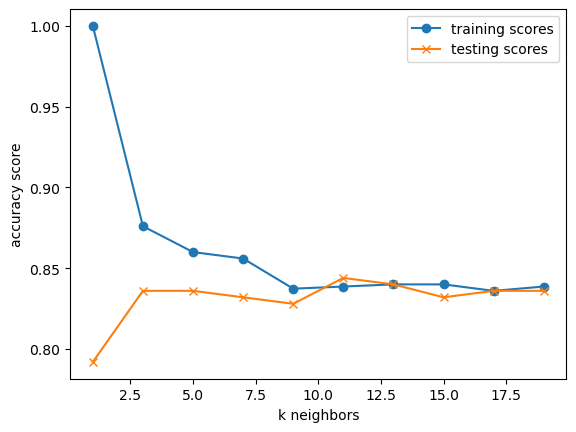

In [13]:
import matplotlib.pyplot as plt
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_encoded)
    train_score = knn.score(X_train_scaled, y_train_encoded)
    test_score = knn.score(X_test_scaled, y_test_encoded)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [14]:
# Create the KNN model with 11 neighbors
knn_model = KNeighborsClassifier(n_neighbors=11)

# Fit the model to the training data
knn_model.fit(X_train_scaled, y_train_encoded)

KNeighborsClassifier(n_neighbors=11)

In [15]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {knn_model.score(X_train_scaled, y_train_encoded)}")
print(f"Testing Data Score: {knn_model.score(X_test_scaled, y_test_encoded)}")

Training Data Score: 0.8386666666666667
Testing Data Score: 0.844


## Model and Fit to a Decision Tree Classifier

In [16]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train_scaled, y_train_encoded)

DecisionTreeClassifier()

In [17]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {dt_model.score(X_train_scaled, y_train_encoded)}")
print(f"Testing Data Score: {dt_model.score(X_test_scaled, y_test_encoded)}")

Training Data Score: 1.0
Testing Data Score: 0.744


## Model and Fit to a Random Forest Classifier

In [18]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train_encoded)

RandomForestClassifier(n_estimators=128, random_state=1)

In [19]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {rf_model.score(X_train_scaled, y_train_encoded)}")
print(f"Testing Data Score: {rf_model.score(X_test_scaled, y_test_encoded)}")

Training Data Score: 1.0
Testing Data Score: 0.836


## Model and Fit to a Gradient Boosting Classifier

In [20]:
# Train the Gradient Boosting classifier
clf = GradientBoostingClassifier(random_state=1).fit(X_train_scaled, y_train_encoded)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train_encoded)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test_encoded)}')

Training Score: 0.9693333333333334
Testing Score: 0.84


## Model and Fit to an Adaptive Boosting Classifier

In [21]:
# Train the AdaBoostClassifier
clf = AdaBoostClassifier(random_state=1).fit(X_train_scaled, y_train_encoded)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train_encoded)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test_encoded)}')

Training Score: 0.8933333333333333
Testing Score: 0.836
